# Training Classifiers for ESG Ratings

In [1]:
from ekorpkit import eKonf

if eKonf.is_colab():
    eKonf.mount_google_drive()
workspace_dir = "/workspace"
project_name = "ekorpkit-book/exmaples"
task_name = "esg"
ws = eKonf.set_workspace(
    workspace=workspace_dir, 
    project=project_name, 
    task=task_name, 
    log_level="INFO"
)
print("version:", ws.version)
print("project_dir:", ws.project_dir)

INFO:ekorpkit.base:Set environment variable EKORPKIT_DATA_ROOT=/workspace/data
INFO:ekorpkit.base:Set environment variable CACHED_PATH_CACHE_ROOT=/workspace/.cache/cached_path


version: 0.1.40.post0.dev55
project_dir: /workspace/projects/ekorpkit-book/exmaples
time: 936 ms (started: 2022-12-15 11:57:47 +00:00)


## Preparing `esg_polarity_kr` dataset

In [2]:
from ekorpkit.datasets.dataset import Dataset

ds_cfg = eKonf.compose("dataset=dataset")
ds_cfg.name = 'esg_polarity_kr'
ds_cfg.data_dir = ds_cfg.path.data_dir
ds = Dataset(**ds_cfg)

INFO:ekorpkit.datasets.config:Loaded info file: /workspace/projects/ekorpkit-book/exmaples/data/inputs/esg_polarity_kr/info-esg_polarity_kr.yaml
INFO:ekorpkit.info.column:index: index, index of data: index, columns: ['id', 'text', 'labels', 'split'], id: ['id']
INFO:ekorpkit.info.column:Adding id [split] to ['id']
INFO:ekorpkit.info.column:Added id [split], now ['id', 'split']
INFO:ekorpkit.info.column:Added a column [split] with value [train]
INFO:ekorpkit.info.column:Added a column [split] with value [test]
INFO:ekorpkit.info.column:Added a column [split] with value [dev]


time: 1.83 s (started: 2022-12-15 11:57:48 +00:00)


In [3]:
ds.INFO

{'splits': {'train': {'data_file': 'esg_polarity_kr-train.parquet',
   'name': 'train',
   'num_examples': 8713,
   'num_bytes': 5631718,
   'num_bytes_median': 694.0,
   'num_bytes_max': 3196,
   'num_bytes_min': 28,
   'human_bytes': '5.37 MiB'},
  'test': {'data_file': 'esg_polarity_kr-test.parquet',
   'name': 'test',
   'num_examples': 2724,
   'num_bytes': 1764544,
   'num_bytes_median': 697.0,
   'num_bytes_max': 1893,
   'num_bytes_min': 77,
   'human_bytes': '1.68 MiB'},
  'dev': {'data_file': 'esg_polarity_kr-dev.parquet',
   'name': 'dev',
   'num_examples': 2179,
   'num_bytes': 1411447,
   'num_bytes_median': 696.0,
   'num_bytes_max': 3295,
   'num_bytes_min': 16,
   'human_bytes': '1.35 MiB'}},
 'num_examples': 13616,
 'size_in_bytes': 8807709,
 'size_in_human_bytes': '8.40 MiB',
 'data_files': {'train': 'esg_polarity_kr-train.parquet',
  'test': 'esg_polarity_kr-test.parquet',
  'dev': 'esg_polarity_kr-dev.parquet'},
 'meta_files': {},
 'data_files_modified': '2022-07-1

time: 3.82 ms (started: 2022-12-15 11:57:50 +00:00)


## Training a polarity classficiation model with `esg_polarity_kr` dataset

In [4]:
from ekorpkit.models.transformer.simple import SimpleClassification
from ekorpkit import eKonf

model_cfg = eKonf.compose('task=simple.classification')
model_cfg.name = "esg_polarity"
model_cfg.dataset.data_dir = ds.data_dir
model_cfg.dataset.data_files = ds.data_files
model_cfg.model.model_name_or_path = "entelecheia/ekonelectra-base-discriminator"
model_cfg.trainer.num_train_epochs = 2
model_cfg.trainer.max_seq_length = 256
model_cfg.trainer.train_batch_size = 32
model_cfg.trainer.eval_batch_size = 32
# eKonf.print(model_cfg.model.eval)

sm = SimpleClassification(**model_cfg)

2022-12-15 11:57:50.922745: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


time: 6.41 s (started: 2022-12-15 11:57:50 +00:00)


In [ ]:
sm.train()

INFO:ekorpkit.datasets.config:Train data: (8713, 4)
INFO:ekorpkit.datasets.config:Test data: (2724, 4)
INFO:ekorpkit.models.transformer.simple:Renaming columns: {}
INFO:ekorpkit.models.transformer.simple:Renaming columns: {}
INFO:ekorpkit.models.transformer.simple:Renaming columns: {}
Some weights of the model checkpoint at entelecheia/ekonelectra-base-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.weight']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect 

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Initializing WandB run for training.
wandb: Currently logged in as: entelecheia. Use `wandb login --relogin` to force relogin


Running Epoch 0 of 2:   0%|          | 0/273 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_utils: Saving features into cached file /workspace/.cache/cached_dev_electra_256_3_2
INFO:simpletransformers.classification.classification_model:{'mcc': 0.49076725275249233, 'acc': 0.7549334557136301, 'eval_loss': 0.5612490766722223}


Running Epoch 1 of 2:   0%|          | 0/273 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_utils: Saving features into cached file /workspace/.cache/cached_dev_electra_256_3_2
INFO:simpletransformers.classification.classification_model:{'mcc': 0.5123818334583414, 'acc': 0.7535566773749426, 'eval_loss': 0.555486556628476}
INFO:simpletransformers.classification.classification_model: Training of electra model complete. Saved to /workspace/projects/ekorpkit-book/exmaples/esg/models/esg_polarity-classification.
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_utils: Saving features into cached file /workspace/.cache/cached_dev_electra_256_3_2


Running Evaluation:   0%|          | 0/86 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Initializing WandB run for evaluation.


In [ ]:
sm.eval()

## Preparing `esg_topics_improved` dataset

In [7]:
ds_cfg = eKonf.compose('dataset')
ds_cfg.name = 'esg_topics_improved'
ds_cfg.data_dir = '/workspace/data/datasets/simple'
ds = eKonf.instantiate(ds_cfg)
labels = list(ds.splits['train'].labels.unique())
print(labels)

['S-기업(공급망)동반성장/상생', 'G-지배구조', 'G-기업윤리/불공정/소송', 'S-소비자', 'E-환경혁신', 'S-사회공헌', 'S-고용', 'E-환경영향', 'E-기후변화', 'S-재해/안전관리']


## Training a category classficiation model with `esg_topics_improved` dataset

In [8]:
overrides=[
    '+model/transformer=classification',
    '+model/transformer/pretrained=ekonelectra-base',
]
model_cfg = eKonf.compose('model/transformer=classification', overrides)
model_cfg.name = "esg_topics"
model_cfg.dataset = ds_cfg
model_cfg.verbose = False
model_cfg.config.num_train_epochs = 2
model_cfg.config.max_seq_length = 256
model_cfg.config.train_batch_size = 32
model_cfg.config.eval_batch_size = 32
model_cfg._method_ = ['train']
eKonf.instantiate(model_cfg)

INFO:ekorpkit.base:Calling train
Some weights of the model checkpoint at entelecheia/ekonelectra-base-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at entelecheia/ekonelectra-base-disc

  0%|          | 0/8953 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (731 > 512). Running this sequence through the model will result in indexing errors


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Running Epoch 0 of 2:   0%|          | 0/289 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/289 [00:00<?, ?it/s]

  0%|          | 0/1106 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/36 [00:00<?, ?it/s]

Training loss,█▇▄▄▄▂▂▁▄▃▁
acc,▁█
eval_loss,█▁
global_step,▁▂▂▃▄▄▄▅▆▆▇██
lr,█▇▇▆▅▄▄▃▂▂▁
mcc,▁█
train_loss,▁█
Training loss,0.37387
acc,0.77688
eval_loss,0.77565
global_step,578


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


INFO:ekorpkit.base:Calling eval


  0%|          | 0/1106 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (712 > 512). Running this sequence through the model will result in indexing errors


  0%|          | 0/36 [00:00<?, ?it/s]

Accuracy:  0.77124773960217
Precison:  0.772127422955764
Recall:  0.77124773960217
F1 Score:  0.7653639797849325
Model Report: 
___________________________________________________
                  precision    recall  f1-score   support

          E-기후변화       0.73      0.65      0.69        63
          E-환경영향       0.49      0.51      0.50        61
          E-환경혁신       0.66      0.77      0.71       102
   G-기업윤리/불공정/소송       0.65      0.55      0.60        91
          G-지배구조       0.82      0.87      0.84       172
            S-고용       0.87      0.91      0.89       156
S-기업(공급망)동반성장/상생       0.85      0.28      0.42        39
          S-사회공헌       0.77      0.87      0.81        68
           S-소비자       0.82      0.84      0.83       317
       S-재해/안전관리       0.79      0.70      0.74        37

        accuracy                           0.77      1106
       macro avg       0.74      0.69      0.70      1106
    weighted avg       0.77      0.77      0.77      1106



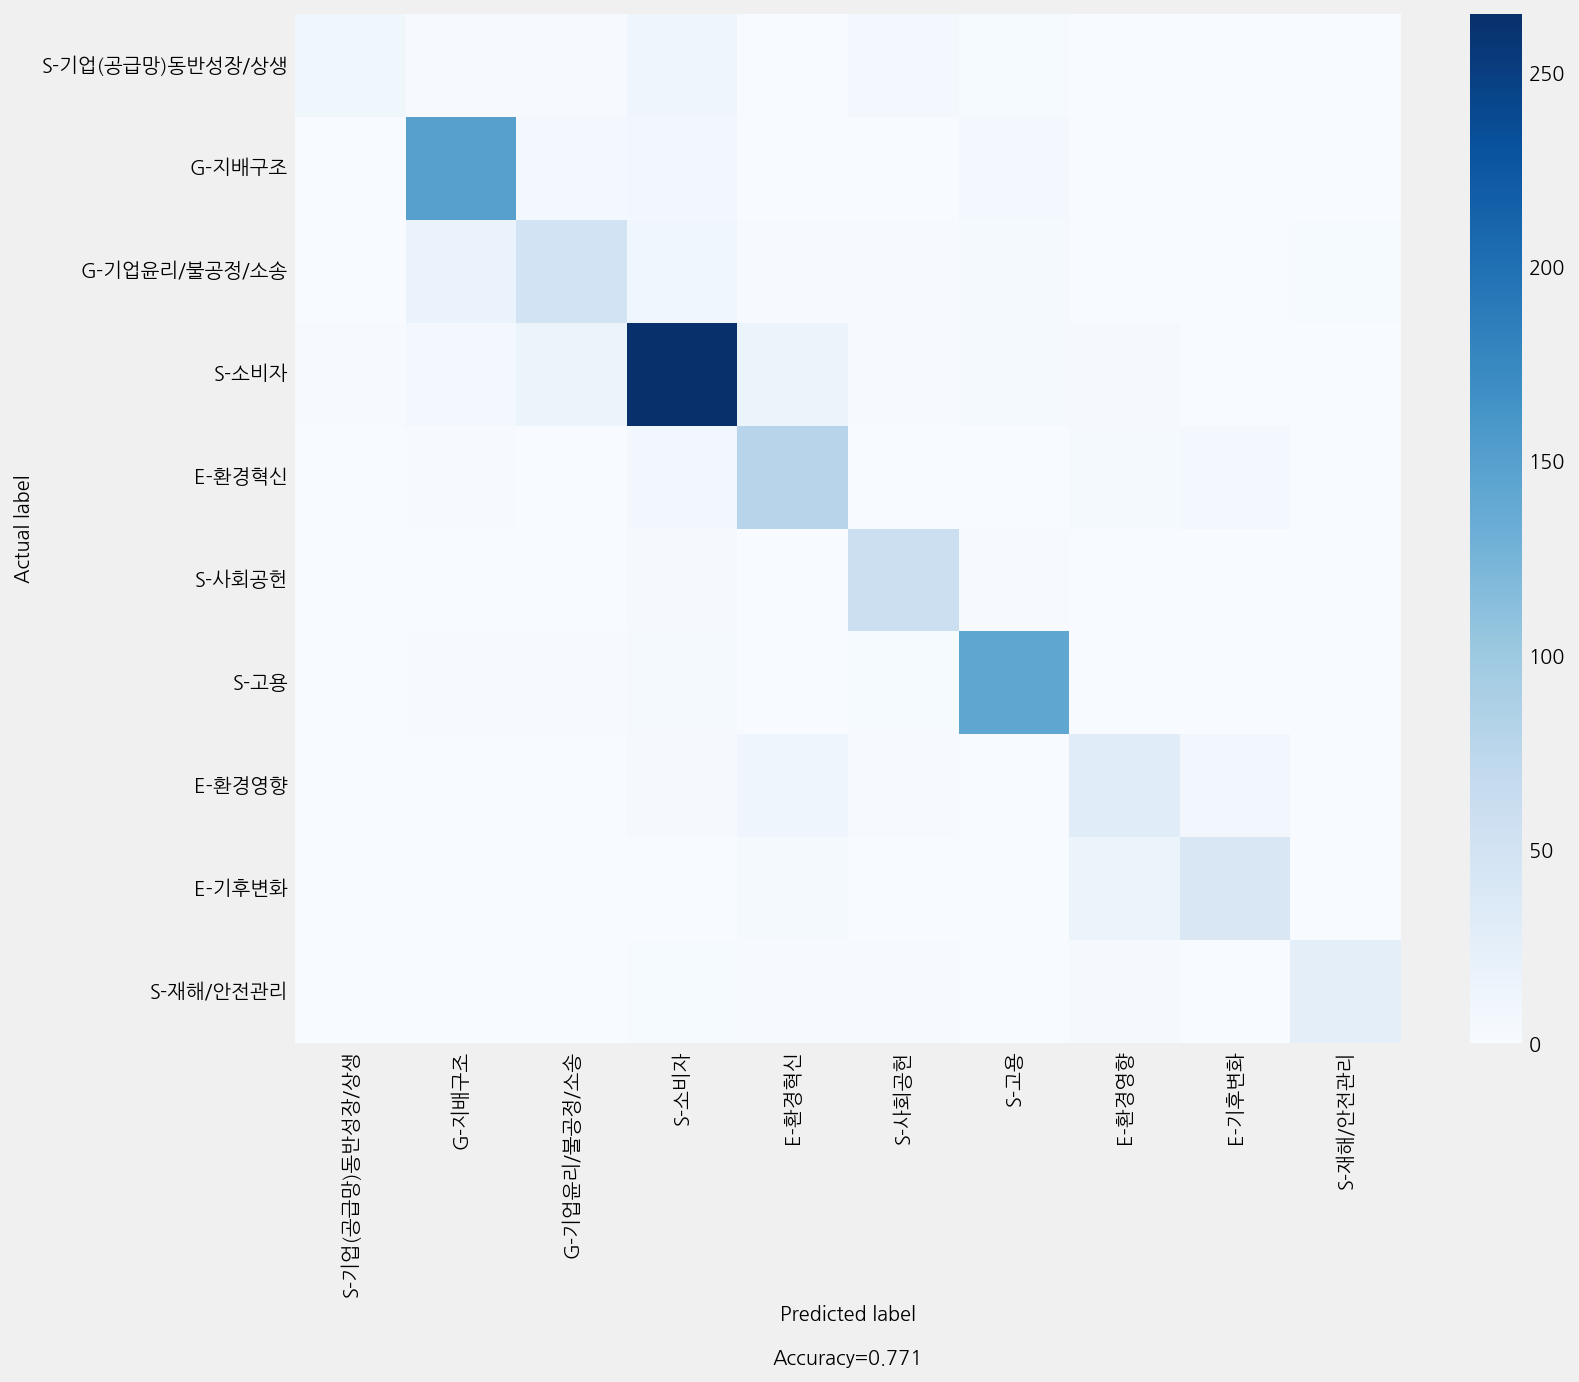

In [9]:
model_cfg._method_ = ['eval']
model_cfg.model.eval.visualize.plot.confusion_matrix.include_values = False
model_cfg.model.eval.visualize.plot.confusion_matrix.include_percentages = False
model_cfg.model.eval.visualize.plot.figure.figsize = (12,10)
eKonf.instantiate(model_cfg)